# KNN

In [165]:
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [166]:
iris=datasets.load_iris()

In [167]:
x=iris.data
y=iris.target

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=23)

In [168]:
knn=KNeighborsClassifier(n_neighbors=3)

In [169]:
knn.fit(xtrain,ytrain)
y_pred=knn.predict(xtest)

C:\Users\vinee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [170]:
metrics.accuracy_score(ytest,y_pred)

0.9666666666666667

In [171]:
metrics.confusion_matrix(ytest,y_pred)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  1,  9]], dtype=int64)

In [172]:
print(metrics.classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      1.00      0.94         8
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [173]:
mat=metrics.confusion_matrix(ytest,y_pred)

In [174]:
c,w=0,0
for i in range(len(mat)):
    for j in range(len(mat[0])):
        if i==j:
            c+=mat[i][j]
        else:
            w+=mat[i][j]
print(c,w)

29 1


# EM KMeans GaussianMixture

In [175]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn import datasets

In [176]:
iris=datasets.load_iris()

In [177]:
print(iris.feature_names,iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']


In [178]:
x=pd.DataFrame(iris.data)

In [179]:
x.columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [180]:
y=pd.DataFrame(iris.target)

In [181]:
y.columns=['Targets']

In [182]:
model=KMeans(n_clusters=3,random_state=100)
model.fit(x)
y_pred=model.labels_

In [183]:
gmm=GaussianMixture(n_components=3,covariance_type="full",random_state=100)
gmm.fit(x)
y_pred_gmm=gmm.predict(x)
# help(GaussianMixture)

Text(0.5, 1.0, 'GMM')

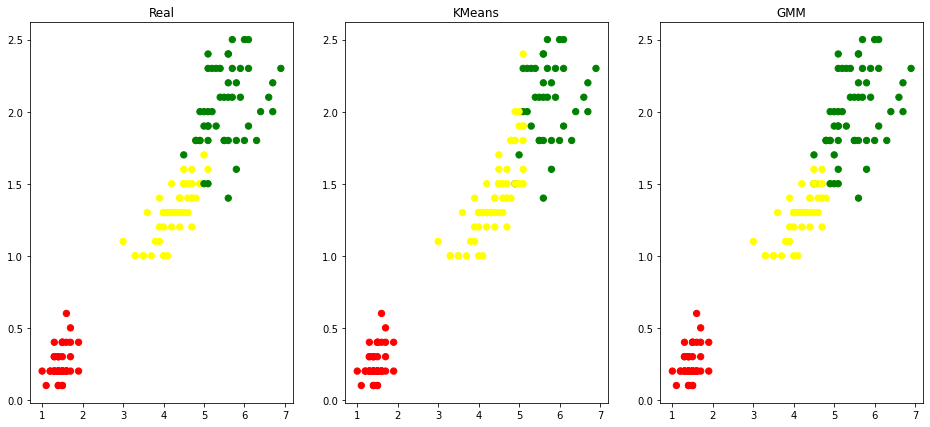

In [184]:
colormap=np.array(['red','yellow','green'])
plt.figure(figsize=(16,7))
plt.subplot(1,3,1)
plt.scatter(x.petal_length,x.petal_width,c=colormap[y.Targets],s=40)
plt.title('Real')
plt.subplot(1,3,2)
plt.scatter(x.petal_length,x.petal_width,c=colormap[y_pred],s=40)
plt.title('KMeans')
plt.subplot(1,3,3)
plt.scatter(x.petal_length,x.petal_width,c=colormap[y_pred_gmm],s=40)
plt.title('GMM')

In [185]:
metrics.accuracy_score(y,y_pred)

0.8933333333333333

In [186]:
metrics.accuracy_score(y,y_pred_gmm)

0.9666666666666667

In [187]:
print(metrics.confusion_matrix(y,y_pred))

[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]


In [188]:
print(metrics.confusion_matrix(y,y_pred_gmm))

[[50  0  0]
 [ 0 45  5]
 [ 0  0 50]]


# LW

In [189]:
import numpy as np
import matplotlib.pyplot as plt

In [190]:
x_train=np.array(list(range(3,33))+[3.2,4.2])
x_train=x_train[:,np.newaxis]

In [191]:
y_train=np.array([1,1,2,2,3,4,5,3,4,5,5,6,7,8,9,11,11,12,13,13,12,14,16,17,18,19,17,13,13,21,23,23])
y_train=y_train[:,np.newaxis]

In [192]:
x_test=np.array([i/10 for i in range(400)])
x_test=x_test[:,np.newaxis]

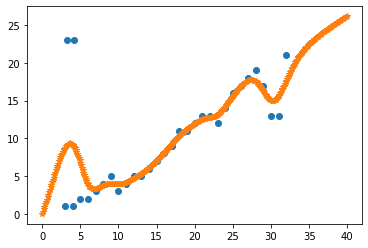

In [193]:
y_test=[]
tou=0.8

for i in x_test:
    try:
        wt=np.exp(-np.sum((x_train-i),axis=1)**2/(2*tou)**2)
        w=np.diag(wt)
        part1=np.linalg.inv((x_train.T).dot(w).dot(x_train))
        part2=part1.dot(x_train.T).dot(w).dot(y_train)
        pred=i.dot(part2)
        y_test.append(pred)
    except:
        pass
y_test=np.array(y_test)
plt.plot(x_train.squeeze(),y_train,'o')
plt.plot(x_test.squeeze(),y_test,'*')
plt.show()

# NB

In [194]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [195]:
filename='diabetes.csv'
df=pd.read_csv(filename)
df=df.astype('float')

In [196]:
train=df.sample(frac=0.8,random_state=100)

In [197]:
test=df.drop(train.index)

In [198]:
xtrain=train.iloc[:,:-1]

In [199]:
ytrain=train.iloc[:,-1]

In [200]:
xtest=test.iloc[:,:-1]

In [201]:
gnb=GaussianNB()
gnb.fit(xtrain,ytrain)
y_pred=gnb.predict(xtest)

In [202]:
ytest=test.iloc[:,-1]
metrics.accuracy_score(y_pred,ytest)

0.7402597402597403